# 文字認識

## 手書き数字の光学認識データセットを使ってみる
使用するのはsckit-learnに標準で付属しているOptical Recognition of HandWritten Digits Data Set  
$8 \times 8$ピクセルの手書き数字データが5620個ほど用意されている  
url(https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

In [1]:
# sciki-learnに収録されている手書き数字データを読み込む
from sklearn import datasets
digits = datasets.load_digits()

読み出したデータセットは辞書型  
・digits.images - 画像データの配列  
・digits.target - データがどの数字を表すかのラベルデータ

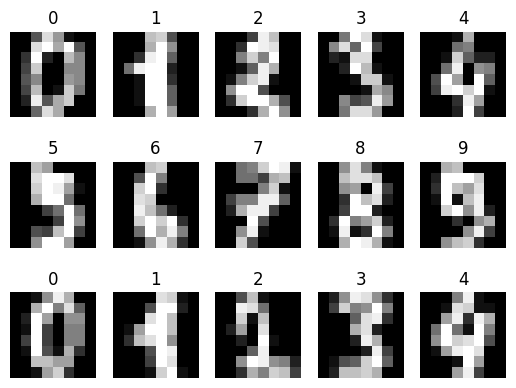

In [3]:
# データを確認する

import matplotlib.pyplot as plt

# sciki-learnに収録されている手書き数字データを読み込む
from sklearn import datasets
digits = datasets.load_digits()

# 15個出力
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

plt.subplot() - 複数のデータをプロットするのに利用

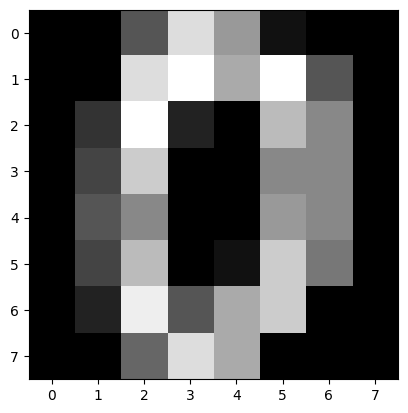

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
# 画像のフォーマット
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

$8 \times 8$ピクセルで0-16までの値で表現  
0が透明 → 16が白(背景は黒)

## 画像を機械学習する
画像の画素データを学習データとして判別できるのかを確認する  
8割を学習用, 残り2割をテスト用に振り分け

In [15]:
# 機械学習による文字の判別
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score


# データの読み込み
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 二次元配列を1次元配列に変換

# データの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 予測と精度確認
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9388888888888889


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


大体0.93 - 0.96

In [10]:
# 学習済みデータをデータファイルとして保存する
from sklearn.externals import joblib
joblib.dump(clf, '../learned_data/digits.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/opt/homebrew/lib/python3.11/site-packages/sklearn/externals/__init__.py)

どうやらjoblibはexternalsにバインドされなくなっているらしい
→ import joblib

In [16]:
# 学習済みデータをデータファイルとして保存する
import joblib
joblib.dump(clf, '../learned_data/digits.pkl')

['../learned_data/digits.pkl']

Pickleファイル - Pythonにおいてデータを直列化（Serialize）したもので、非常に簡単にいうとデータの細かい情報までを保持した状態でファイルに落とし込んだもの

## 自身の手描き画像を判定させてみる

In [18]:
import cv2
import joblib


def predict_digit(file_name):
    # 学習済みデータの読み込み
    clf = joblib.load("../learned_data/digits.pkl")

    # 用意した手書き画像の読み込み
    my_img = cv2.imread(file_name)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_RGB2GRAY)
    my_img = 15 - my_img    # 白黒反転

    # 二次元配列を一次元に変換
    my_img = my_img.reshape((-1, 64))

    # データの予測
    res = clf.predict(my_img)
    return res[0]

In [19]:
n1 = predict_digit("../self_digits/five.png")
print("five.png = " + str(str(n1)))

n2 = predict_digit("../self_digits/two.png")
print("two.png = " + str(str(n2)))

five.png = 4
two.png = 4


どうやらうまく判別できていない  
~原因~  
・文字が左右によっている  
・ペンの細さ  
などで正しく判定できないことがある

## 画像を対象とする機械学習のポイント
・前処理が大事 → 画像のサイズを一定に合わせる, 画像の色空間を合わせる etc..  

### 改良のヒント
・良質なデータが多いほど高い精度が出せる → MNIST　etc..